# **Capstone - lightgbm price model trial run**

## **Xiaoyang Xu**
**BA888 Team 2 Cohort B**


**Select GPU in the Runtime settings.**

Note: This listing only contains those are below 800 bucks per night (the 99% percentile in NYC Airbnb is $799 using Dec 2019's data).



In [ ]:
# code preface
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt

In [ ]:
airbnb = pd.read_csv("888_com.csv")

In [ ]:
airbnb.head()

,Unnamed: 0,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,instant_bookable,require_guest_phone_verification,require_guest_profile_picture,bed_type_Real Bed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Airbed,bed_type_Couch,cancellation_policy_moderate,...,cancellation_policy_super_strict_30,host_response_time_within an hour,host_response_time_N/A,host_response_time_within a few hours,host_response_time_a few days or more,host_response_time_within a day,host_response_time_,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Staten Island,property_type_Guest suite,property_type_Apartment,property_type_Townhouse,property_type_Loft,property_type_Bed and breakfast,property_type_Condominium,property_type_House,property_type_Boutique hotel,property_type_Guesthouse,property_type_Boat,property_type_Serviced apartment,property_type_Earth house,property_type_Bungalow,property_type_Other,property_type_Hostel,property_type_Cottage,property_type_Aparthotel,property_type_Villa,property_type_Hotel,property_type_Resort,property_type_Tiny house,property_type_Camper/RV,property_type_Tent,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_Hotel room,price
0,1,1.0,0,1,1,4,1,3,1.0,1,4,38,500,0,1,0,1,730.0,1,1,1,1,295,9,10,9,9,10,90,9,4.67,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
1,2,0.9,0,1,1,5,0,2,1.0,1,1,32,300,125,2,100,3,21.0,19,19,19,19,78,10,10,9,10,10,90,9,0.60,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,200
2,3,1.0,0,1,1,8,0,2,0.0,1,1,6,450,0,1,30,29,730.0,30,60,90,365,49,8,10,8,10,9,90,9,0.38,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60
3,4,1.0,0,1,1,4,0,2,1.0,1,1,20,0,15,1,12,2,14.0,3,12,40,242,454,9,9,7,9,10,84,8,3.52,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,79
4,5,1.0,1,4,4,6,1,3,1.0,1,2,27,0,40,2,10,1,1125.0,1,1,1,1,161,10,10,9,10,9,94,9,1.29,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,150


In [ ]:
airbnb.info()
airbnb.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45012 entries, 0 to 45011
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       45012 non-null  int64  
 1   host_response_rate                               45012 non-null  float64
 2   host_is_superhost                                45012 non-null  int64  
 3   host_listings_count                              45012 non-null  int64  
 4   host_total_listings_count                        45012 non-null  int64  
 5   host_verifications                               45012 non-null  int64  
 6   host_identity_verified                           45012 non-null  int64  
 7   accommodates                                     45012 non-null  int64  
 8   bathrooms                                        45012 non-null  float64
 9   bedrooms                    

(45012, 84)

In [ ]:
x = airbnb.loc[:,'host_response_rate':'room_type_Hotel room']
y = airbnb.loc[:,'price']

In [ ]:
x.shape


(45012, 82)

## Splitting Training and Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn import metrics

## Validation Set

In [ ]:
x_realtrain,x_valid,y_realtrain,y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state = 7)

In [ ]:
lg_train = lgb.Dataset(x_realtrain,label = y_realtrain)
lg_valid = lgb.Dataset(x_valid,y_valid)

## Lightgbm Parameters

In [ ]:
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['sub_feature'] = 0.5
params['num_leaves'] = 200
params['min_data'] = 3


In [ ]:
lg1 = lgb.train(params,lg_train,3500,early_stopping_rounds = 5,valid_sets = lg_valid)

[1]	valid_0's l2: 10850.7
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 10794.6
[3]	valid_0's l2: 10737.1
[4]	valid_0's l2: 10691.3
[5]	valid_0's l2: 10639.2
[6]	valid_0's l2: 10593
[7]	valid_0's l2: 10537.9
[8]	valid_0's l2: 10480.6
[9]	valid_0's l2: 10434.9
[10]	valid_0's l2: 10389.2
[11]	valid_0's l2: 10349.1
[12]	valid_0's l2: 10306.5
[13]	valid_0's l2: 10252.8
[14]	valid_0's l2: 10198.5
[15]	valid_0's l2: 10153.2
[16]	valid_0's l2: 10095.6
[17]	valid_0's l2: 10039.3
[18]	valid_0's l2: 9983.51
[19]	valid_0's l2: 9950.66
[20]	valid_0's l2: 9903.51
[21]	valid_0's l2: 9860.23
[22]	valid_0's l2: 9806.19
[23]	valid_0's l2: 9756.64
[24]	valid_0's l2: 9707.82
[25]	valid_0's l2: 9661.42
[26]	valid_0's l2: 9611.77
[27]	valid_0's l2: 9564.93
[28]	valid_0's l2: 9527.83
[29]	valid_0's l2: 9485.89
[30]	valid_0's l2: 9444.47
[31]	valid_0's l2: 9399.26
[32]	valid_0's l2: 9354.76
[33]	valid_0's l2: 9314.12
[34]	valid_0's l2: 9270.33
[35]	valid_0's l2: 9231.56
[36]	

## Model Features and Importance

In [ ]:
print('feature names',lg1.feature_name())

feature names ['host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'reviews_per_month', 'instant_bookable', 'require_guest_phone_verification', 'require_guest_profile_picture', 'bed_type_Real_Bed', 'bed_type_Futon', 'bed_type_Pull-out_Sofa', 'bed_type_Airbed', 'bed_type_Couch', 'cancellation_policy_moderate', 'cancellation_policy_strict_14_with_grace_period', 'cancellation_policy_flexible', 'cancellation_policy_strict', 'cancellation_policy_super_strict_

In [ ]:
print(lg1.feature_importance())

[ 5656  1136  6985  3692 10254  2514  8847  4343  5954  5535 18031 10626
 13956  5456  9526  9741 11669  9234  8575  8231 11481 11744  2460  1835
  2971  1537  3567  6494  2746 14401  2453   624   539   464   239     2
    41    62  1532  1939  2048     0     0    40  1555  1911  1139   258
  1055    62  2140  1904  1157   760   625   201  2297   527  1435     5
  1750   849   713   119     0   529     0    37   255     4     0     6
    22   606   462     0   103    76  1130  1261   703   282]


In [ ]:
lg1.feature_name

<bound method Booster.feature_name of <lightgbm.basic.Booster object at 0x7fcafa453898>>

In [ ]:
df = {'Feature_Name': lg1.feature_name(),
      'Importance':lg1.feature_importance()}
df1 = pd.DataFrame(df)

In [ ]:
df1.head()

,Feature_Name,Importance
0,host_response_rate,5656
1,host_is_superhost,1136
2,host_listings_count,6985
3,host_total_listings_count,3692
4,host_verifications,10254


In [ ]:
df1.to_csv("lightgbm_importance.csv")

## Visualize This Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.787498 to fit


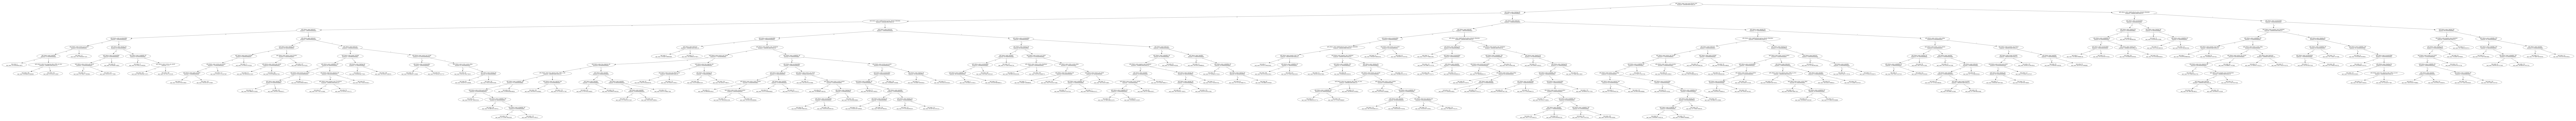

In [ ]:
lgb.plot_tree(lg1,figsize = (200,200))

It's hard to tell from the graph from here. You would need to download the graph to see all the characters.


The tree first splits at room type for boutique hotel room, and then split for neighborhood (Manhattan), property type and cleaning fee.

## Let's look at Feature Importance in a Graph






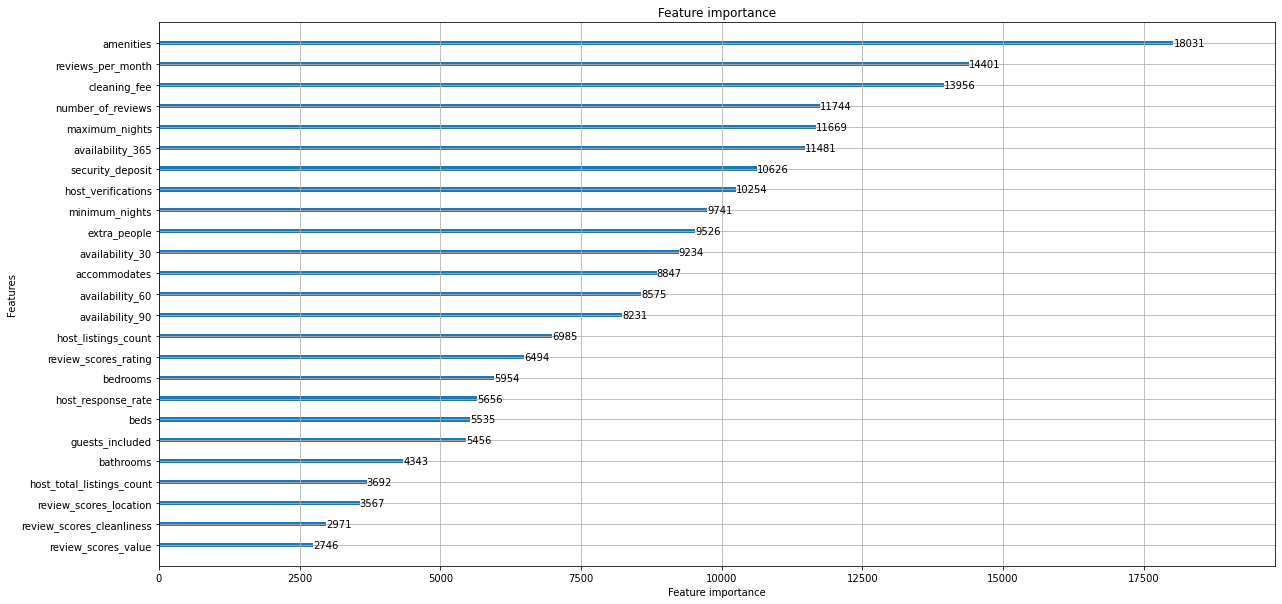

In [ ]:
lgb.plot_importance(lg1,figsize = (20,10),max_num_features = 25)

In [ ]:
y_pred = lg1.predict(x_test)
from sklearn.metrics import mean_squared_error
accuracy= mean_squared_error(y_pred,y_test)
print(accuracy)

3688.8232443891307


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred, y_test)

0.41660174219733326



Square root of 3688.8 is around 60.7. Not too bad! Certainly has room for improvement. Most of listings are around $200 per night for NYC Airbnb.


##Factor Importance
Look at top important factors: number of reviews per month, cleaning fee, availability in a year, number of reviews, security deposit, and min&max nights. There is something interesting underlying these factors.   
In fact, Airbnb is not just for vacational bookings, but for short/long term rentals as well. The latter part is why Airbnb was in legal dispute with NYC government. We can separate these listings by their intended guest length of stay by looking into variables such as minimum night, security deposit and availability in a year.

In [ ]:
yd = pd.DataFrame(y_pred)

In [ ]:
yt = lg1.predict(x_train)
yt = pd.DataFrame(yt)
yt.shape

(31508, 1)

In [ ]:
yt.to_csv("gbm_y_train.csv")

In [ ]:
yv = lg1.predict(x_valid)
yv = pd.DataFrame(yv)
yv.to_csv("gbm_v.csv")

In [ ]:
yd.to_csv("lb_y_pred.csv")